In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank.csv',sep=';')

In [4]:
# This Datasets describe the Bank Marketing Campaign, the objective of this dataset's machine learning is to optimize the marketing camapign of banking instituion in the future

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

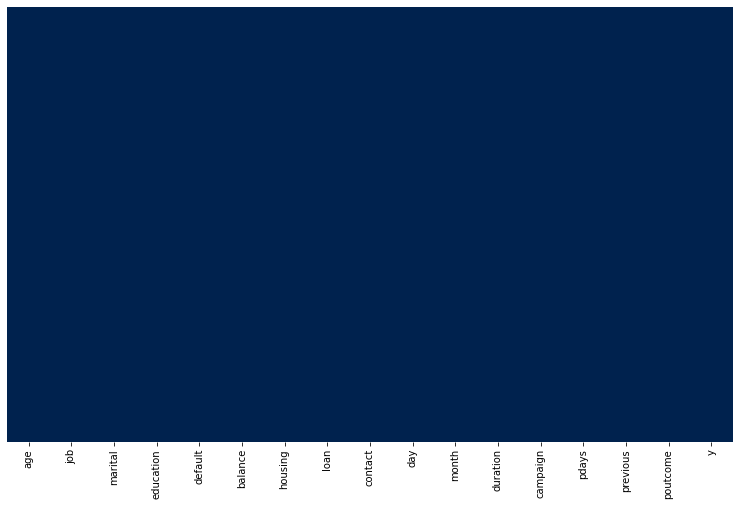

In [8]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna(),cmap='cividis',yticklabels=False,cbar=False)
plt.show()

In [9]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) *100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [10]:
pd.DataFrame(dataDesc,columns=[
    "Data Features",
    "Data Type",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,age,int64,0,0.0,67,"[28, 34]"
1,job,object,0,0.0,12,"[admin., management]"
2,marital,object,0,0.0,3,"[married, divorced]"
3,education,object,0,0.0,4,"[unknown, secondary]"
4,default,object,0,0.0,2,"[yes, no]"
5,balance,int64,0,0.0,2353,"[666, 702]"
6,housing,object,0,0.0,2,"[yes, no]"
7,loan,object,0,0.0,2,"[no, yes]"
8,contact,object,0,0.0,3,"[unknown, telephone]"
9,day,int64,0,0.0,31,"[7, 18]"


In [11]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [12]:
df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [13]:
df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [14]:
df['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [15]:
df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [17]:
# Initial Hypothesis

In [18]:
# Age, job, marital, education, default, balance, housing, loan, contact, duration, pdays, previous will affect the successful of the campaign

In [19]:
df1 = df[['age','job','marital','education','default','balance','housing','loan','contact','duration','pdays','previous','y']]

In [20]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,-1,0,no


In [21]:
# Data Preparation

In [22]:
df1.describe()

,age,balance,duration,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,39.766645,0.542579
std,10.576211,3009.638142,259.856633,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,871.000000,25.000000


In [23]:
df1[df1['balance']<0]

,age,job,marital,education,default,balance,housing,loan,contact,duration,pdays,previous,y
9,43,services,married,primary,no,-88,yes,yes,cellular,313,147,2,no
18,25,blue-collar,single,primary,no,-221,yes,no,unknown,250,-1,0,no
48,32,entrepreneur,single,primary,yes,-849,yes,yes,cellular,204,-1,0,no
60,41,blue-collar,married,primary,no,-516,no,yes,telephone,554,-1,0,no
92,27,services,single,secondary,no,-195,yes,no,cellular,391,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,44,blue-collar,married,primary,no,-237,yes,no,telephone,73,-1,0,no
4502,42,services,married,secondary,no,-91,yes,yes,cellular,43,-1,0,no
4506,42,unemployed,divorced,tertiary,no,-166,no,no,cellular,85,-1,0,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,329,-1,0,no


In [24]:
df1['marital'] = df1['marital'].map({'single' : 1, 'married' : 2, 'divorced' : 0})

In [25]:
df1['education'] = df1['education'].map({'primary' : 1, 'secondary' : 2, 'tertiary' : 3, 'unknown' : 0})

In [26]:
df1['default'] = df1['default'].map({'yes' : 1, 'no' : 0})

In [27]:
df1['housing'] = df1['housing'].map({'yes' : 1, 'no' : 0})
df1['loan'] = df1['loan'].map({'yes' : 1, 'no' : 0})
df1['y'] = df1['y'].map({'yes' : 1, 'no' : 0})

In [28]:
df1['contact'] = df1['contact'].map({'cellular' : 1, 'unknown' : 0, 'telephone' : 2})

In [29]:
df1[df1['pdays']==0]

,age,job,marital,education,default,balance,housing,loan,contact,duration,pdays,previous,y


In [30]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,pdays,previous,y
0,30,unemployed,2,1,0,1787,0,0,1,79,-1,0,0
1,33,services,2,2,0,4789,1,1,1,220,339,4,0
2,35,management,1,3,0,1350,1,0,1,185,330,1,0
3,30,management,2,3,0,1476,1,1,0,199,-1,0,0
4,59,blue-collar,2,2,0,0,1,0,0,226,-1,0,0


In [31]:
def pdays_recat(x) :
    if x== -1:
        return 0
    else:
        return x

In [32]:
df1['pdays'] = df1['pdays'].apply(pdays_recat)

In [33]:
def job_recat(x) :
    if x == 'management':
        return 1
    elif x == 'blue-collar':
        return 2
    elif x == 'technician':
        return 3
    elif x == 'admin.':
        return 4
    elif x == 'services' or x == 'retired' :
        return 5
    elif x == 'unemployed':
        return 0
    else :
        return 6
        

In [34]:
df1['job'] = df1['job'].apply(job_recat)

In [35]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,pdays,previous,y
0,30,0,2,1,0,1787,0,0,1,79,0,0,0
1,33,5,2,2,0,4789,1,1,1,220,339,4,0
2,35,1,1,3,0,1350,1,0,1,185,330,1,0
3,30,1,2,3,0,1476,1,1,0,199,0,0,0
4,59,2,2,2,0,0,1,0,0,226,0,0,0


In [36]:
# Check Imbalance

In [37]:
(pd.crosstab(index=df1['y'],columns='Count',normalize=True)*100).round(2)

col_0,Count
y,
0,88.48
1,11.52


In [38]:
# Will use Stratify in Splitting Data and Class Weight Algorithm will be used for Improvement

In [39]:
# Check Correlation

In [40]:
# Association Cramser' V

In [41]:
import scipy.stats as ss

In [42]:
def cramers (x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0,phi2 - ((k - 1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    hasil = np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))
    return hasil

In [43]:
assoc_cramers = []
for i in df1.columns:
    assoc = round(cramers(df1['y'],df1[i]),2)
    assoc_cramers.append(assoc)

In [44]:
df_cramers = pd.DataFrame(data=[assoc_cramers],index=['y'],columns=df1.columns)

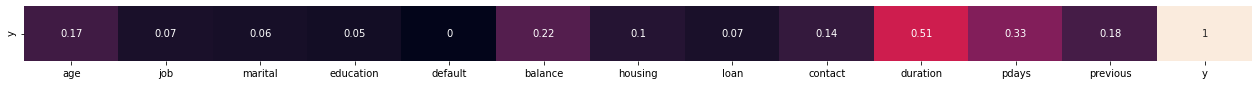

In [45]:
plt.figure(figsize=(22,1))
sns.heatmap(df_cramers,cbar=False,annot=True);

In [46]:
# Correlation Ratio for 'balance' Features

In [47]:
def corr_ratio(categories,measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measure = measurement[np.argwhere(fcat==i).flatten()]
        n_array[i] = len(cat_measure)
        y_avg_array[i] = np.average(cat_measure)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurement,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [48]:
corr_ratio(df1['y'],df1['balance'])

0.017905098387636383

In [49]:
# Feature Selection

In [50]:
df1.drop(columns=['job','marital','education','default','loan'],inplace=True)

In [51]:
df1.head()

,age,balance,housing,contact,duration,pdays,previous,y
0,30,1787,0,1,79,0,0,0
1,33,4789,1,1,220,339,4,0
2,35,1350,1,1,185,330,1,0
3,30,1476,1,0,199,0,0,0
4,59,0,1,0,226,0,0,0


In [52]:
# Splitting Data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df1.drop(columns='y')
y = df1['y']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,stratify=y,random_state=42)

In [56]:
X_train.shape

(3616, 7)

In [57]:
X_test.shape

(905, 7)

In [58]:
# Base Model

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
from sklearn.svm import SVC

In [62]:
Model_LR = LogisticRegression()

In [63]:
Model_KNN = KNeighborsClassifier()

In [64]:
Model_SVM = SVC()

In [65]:
Model_LR.fit(X_train,y_train)


LogisticRegression()

In [66]:
Model_KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
Model_SVM.fit(X_train,y_train)

SVC()

In [68]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,auc

In [69]:
def Eva_Matrix_Class(Model,X,y_true):
    y_pred = Model.predict(X)
    acc = accuracy_score(y_true,y_pred)
    rec = recall_score(y_true,y_pred)
    prec = precision_score(y_true,y_pred)
    roc = roc_auc_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    cm = confusion_matrix(y_true,y_pred,labels=[1,0])
    df_cm = pd.DataFrame(data=cm,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])
    cr = classification_report(y_true,y_pred)
    return acc, rec, prec, roc, f1, df_cm, cr

In [70]:
# Evaluation Matrix Base Model

In [71]:
acc_LR, rec_LR, prec_LR, roc_LR, f1_LR, cm_LR , cr_LR = Eva_Matrix_Class(Model_LR,X_test,y_test)

In [72]:
acc_KNN, rec_KNN, prec_KNN, roc_KNN, f1_KNN, cm_KNN , cr_KNN = Eva_Matrix_Class(Model_KNN,X_test,y_test)

In [73]:
acc_SVM, rec_SVM, prec_SVM, roc_SVM, f1_SVM, cm_SVM , cr_SVM = Eva_Matrix_Class(Model_SVM,X_test,y_test)

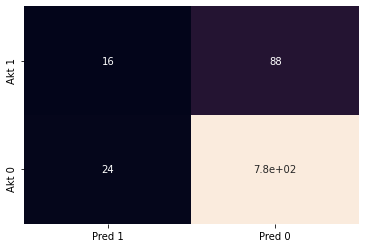

In [74]:
sns.heatmap(cm_LR,cbar=False,annot=True);

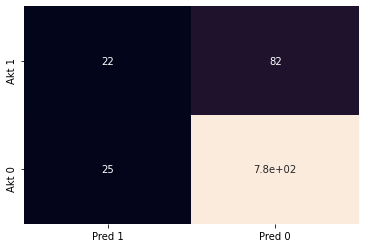

In [75]:
sns.heatmap(cm_KNN,cbar=False,annot=True);

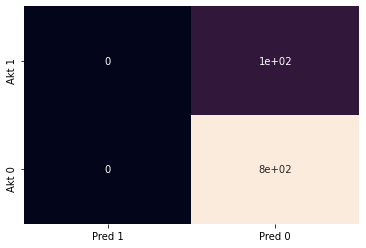

In [76]:
sns.heatmap(cm_SVM,cbar=False,annot=True);

In [77]:
print(cr_LR)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       801
           1       0.40      0.15      0.22       104

    accuracy                           0.88       905
   macro avg       0.65      0.56      0.58       905
weighted avg       0.84      0.88      0.85       905



In [78]:
print(cr_KNN)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       801
           1       0.47      0.21      0.29       104

    accuracy                           0.88       905
   macro avg       0.69      0.59      0.61       905
weighted avg       0.85      0.88      0.86       905



In [79]:
print(cr_SVM)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       801
           1       0.00      0.00      0.00       104

    accuracy                           0.89       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.78      0.89      0.83       905



In [80]:
data_base = {
    'LR' :[acc_LR, rec_LR, prec_LR, roc_LR, f1_LR],
    'KNN' :[acc_KNN, rec_KNN, prec_KNN, roc_KNN, f1_KNN],
    'SVM' :[acc_SVM, rec_SVM, prec_SVM, roc_SVM, f1_SVM]
}

In [81]:
pd.DataFrame(data_base,index=['Accuracy','Recall','Precision','ROC_AUC','F1'])

,LR,KNN,SVM
Accuracy,0.876243,0.881768,0.885083
Recall,0.153846,0.211538,0.000000
Precision,0.400000,0.468085,0.000000
ROC_AUC,0.561942,0.590164,0.500000
F1,0.222222,0.291391,0.000000


In [82]:
# Improvement Class Weight (Handling Imbalance)

In [83]:
cw = np.arange(0,1,0.1)
f1 = []
for i in cw:
    SVM = SVC(class_weight={0:i, 1:(1-i)})
    SVM.fit(X_train,y_train)
    y_pred = SVM.predict(X_test)
    f1_ = f1_score(y_test,y_pred)
    f1.append(f1_)

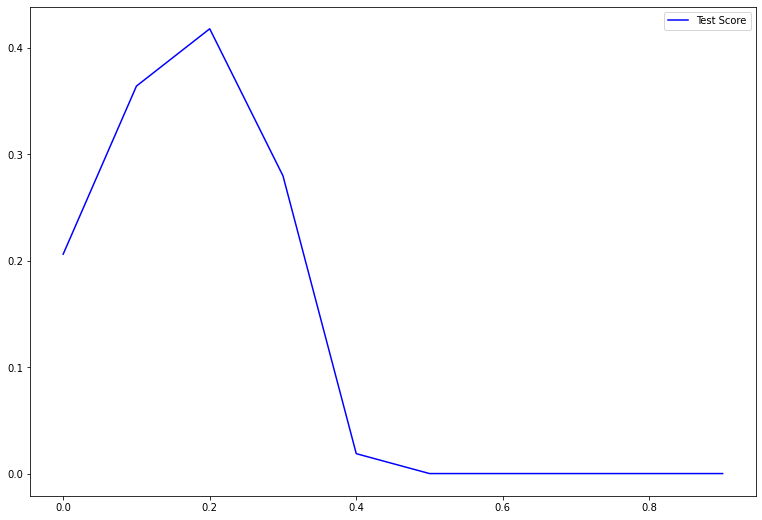

In [84]:
plt.figure(figsize=(13,9))
plt.plot(cw,f1,'b',label='Test Score')
plt.legend()
plt.show()

In [85]:
cw[np.argmax(f1)]

0.2

In [86]:
Model_SVM_CW = SVC(class_weight={0:0.2,1:0.8})

In [87]:
Model_SVM_CW.fit(X_train,y_train)

SVC(class_weight={0: 0.2, 1: 0.8})

In [88]:
acc_SVM_CW, rec_SVM_CW, prec_SVM_CW, roc_SVM_CW, f1_SVM_CW, cm_SVM_CW , cr_SVM_CW = Eva_Matrix_Class(Model_SVM_CW,X_test,y_test)

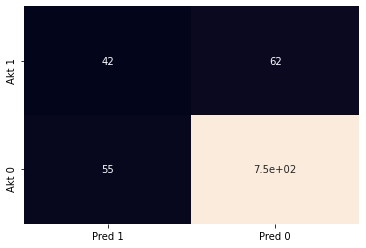

In [89]:
sns.heatmap(cm_SVM_CW,cbar=False,annot=True);

In [90]:
print(cr_SVM_CW)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       801
           1       0.43      0.40      0.42       104

    accuracy                           0.87       905
   macro avg       0.68      0.67      0.67       905
weighted avg       0.87      0.87      0.87       905



In [91]:
data_base = {
    'LR' :[acc_LR, rec_LR, prec_LR, roc_LR, f1_LR],
    'KNN' :[acc_KNN, rec_KNN, prec_KNN, roc_KNN, f1_KNN],
    'SVM' :[acc_SVM, rec_SVM, prec_SVM, roc_SVM, f1_SVM],
    'SVM_Class_Weight' : [acc_SVM_CW, rec_SVM_CW, prec_SVM_CW, roc_SVM_CW, f1_SVM_CW]
}

In [92]:
pd.DataFrame(data_base,index=['Accuracy','Recall','Precision','ROC_AUC','F1'])

,LR,KNN,SVM,SVM_Class_Weight
Accuracy,0.876243,0.881768,0.885083,0.870718
Recall,0.153846,0.211538,0.000000,0.403846
Precision,0.400000,0.468085,0.000000,0.432990
ROC_AUC,0.561942,0.590164,0.500000,0.667591
F1,0.222222,0.291391,0.000000,0.417910


In [93]:
# Improvement Scaling

In [94]:
from sklearn.preprocessing import RobustScaler

In [95]:
sc = RobustScaler()

In [96]:
num_col = df1[['balance']]

In [97]:
sc_num = sc.fit_transform(num_col)

In [98]:
sc_df = pd.DataFrame(sc_num)

In [99]:
sc_df

,0
0,0.951807
1,3.079376
2,0.642098
3,0.731396
4,-0.314670
...,...
4516,-0.550673
4517,-2.662651
4518,-0.105599
4519,0.491141


In [100]:
df_sc = pd.concat([df1,sc_df],axis=1)

In [101]:
df_sc

,age,balance,housing,contact,duration,pdays,previous,y,0
0,30,1787,0,1,79,0,0,0,0.951807
1,33,4789,1,1,220,339,4,0,3.079376
2,35,1350,1,1,185,330,1,0,0.642098
3,30,1476,1,0,199,0,0,0,0.731396
4,59,0,1,0,226,0,0,0,-0.314670
...,...,...,...,...,...,...,...,...,...
4516,33,-333,1,1,329,0,0,0,-0.550673
4517,57,-3313,1,0,153,0,0,0,-2.662651
4518,57,295,0,1,151,0,0,0,-0.105599
4519,28,1137,0,1,129,211,3,0,0.491141


In [102]:
df_sc.drop(columns='balance',inplace=True)

In [103]:
X_sc = df_sc.drop(columns='y')
y_sc = df_sc['y']

In [104]:
X_train_sc,X_test_sc,y_train_sc,y_test_sc = train_test_split(X_sc,y_sc,train_size=0.80,stratify=y_sc,random_state=42)

In [105]:
Model_SVM_CW.fit(X_train_sc,y_train_sc)

SVC(class_weight={0: 0.2, 1: 0.8})

In [106]:
acc_SVM_CW_SC, rec_SVM_CW_SC, prec_SVM_CW_SC, roc_SVM_CW_SC, f1_SVM_CW_SC, cm_SVM_CW_SC , cr_SVM_CW_SC = Eva_Matrix_Class(Model_SVM_CW,X_test_sc,y_test_sc)

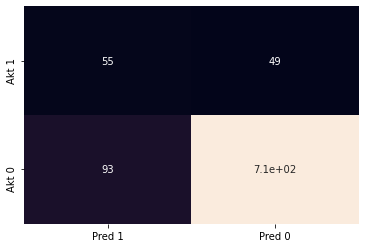

In [107]:
sns.heatmap(cm_SVM_CW_SC,cbar=False,annot=True);

In [108]:
print(cr_SVM_CW_SC)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       801
           1       0.37      0.53      0.44       104

    accuracy                           0.84       905
   macro avg       0.65      0.71      0.67       905
weighted avg       0.87      0.84      0.85       905



In [109]:
data_base = {
    'LR' :[acc_LR, rec_LR, prec_LR, roc_LR, f1_LR],
    'KNN' :[acc_KNN, rec_KNN, prec_KNN, roc_KNN, f1_KNN],
    'SVM' :[acc_SVM, rec_SVM, prec_SVM, roc_SVM, f1_SVM],
    'SVM_Class_Weight' : [acc_SVM_CW, rec_SVM_CW, prec_SVM_CW, roc_SVM_CW, f1_SVM_CW],
    'SVM_Class_Weight_Scaled' : [acc_SVM_CW_SC, rec_SVM_CW_SC, prec_SVM_CW_SC, roc_SVM_CW_SC, f1_SVM_CW_SC]
}

In [110]:
pd.DataFrame(data_base,index=['Accuracy','Recall','Precision','ROC_AUC','F1'])

,LR,KNN,SVM,SVM_Class_Weight,SVM_Class_Weight_Scaled
Accuracy,0.876243,0.881768,0.885083,0.870718,0.843094
Recall,0.153846,0.211538,0.000000,0.403846,0.528846
Precision,0.400000,0.468085,0.000000,0.432990,0.371622
ROC_AUC,0.561942,0.590164,0.500000,0.667591,0.706371
F1,0.222222,0.291391,0.000000,0.417910,0.436508


In [111]:
# Improvement Hyper Parameter Tuning and Cross Validation

In [112]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score

In [113]:
skf = StratifiedKFold(n_splits=4)

In [114]:
Model_SVM_T = SVC(class_weight={0:0.2,1:0.8})

In [115]:
param_SVM ={
    'C' : np.arange(1,10,0.5),
    'gamma' :np.arange(1,10),
}

In [116]:
GS_SVM = GridSearchCV(Model_SVM_T,param_SVM,cv=skf,n_jobs = -1,verbose=1)

In [117]:
GS_SVM.fit(X_train_sc,y_train_sc)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=SVC(class_weight={0: 0.2, 1: 0.8}), n_jobs=-1,
             param_grid={'C': array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5]),
                         'gamma': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=1)

In [118]:
GS_SVM.best_params_

{'C': 1.0, 'gamma': 1}

In [119]:
GS_SVM.best_estimator_

SVC(class_weight={0: 0.2, 1: 0.8}, gamma=1)

In [120]:
Model_SVM_Tuned = GS_SVM.best_estimator_

In [126]:
ACC_SVM, REC_SVM, PREC_SVM, ROC_SVM, F1_SVM, CM_SVM , CR_SVM = Eva_Matrix_Class(Model_SVM_Tuned,X_test_sc,y_test_sc)

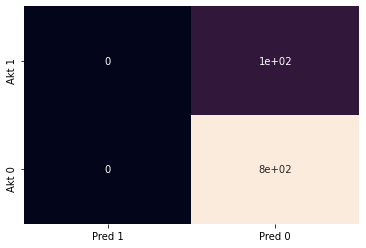

In [127]:
sns.heatmap(CM_SVM,cbar=False,annot=True);

In [128]:
print(CR_SVM)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       801
           1       0.00      0.00      0.00       104

    accuracy                           0.89       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.78      0.89      0.83       905



In [129]:
data_base = {
    'LR' :[acc_LR, rec_LR, prec_LR, roc_LR, f1_LR],
    'KNN' :[acc_KNN, rec_KNN, prec_KNN, roc_KNN, f1_KNN],
    'SVM' :[acc_SVM, rec_SVM, prec_SVM, roc_SVM, f1_SVM],
    'SVM_Class_Weight' : [acc_SVM_CW, rec_SVM_CW, prec_SVM_CW, roc_SVM_CW, f1_SVM_CW],
    'SVM_Class_Weight_Scaled' : [acc_SVM_CW_SC, rec_SVM_CW_SC, prec_SVM_CW_SC, roc_SVM_CW_SC, f1_SVM_CW_SC],
    'SVM_Hyperparameter_Tuning' :[ACC_SVM, REC_SVM, PREC_SVM, ROC_SVM, F1_SVM]
}

In [130]:
pd.DataFrame(data_base,index=['Accuracy','Recall','Precision','ROC_AUC','F1'])

,LR,KNN,SVM,SVM_Class_Weight,SVM_Class_Weight_Scaled,SVM_Hyperparameter_Tuning
Accuracy,0.876243,0.881768,0.885083,0.870718,0.843094,0.885083
Recall,0.153846,0.211538,0.000000,0.403846,0.528846,0.000000
Precision,0.400000,0.468085,0.000000,0.432990,0.371622,0.000000
ROC_AUC,0.561942,0.590164,0.500000,0.667591,0.706371,0.500000
F1,0.222222,0.291391,0.000000,0.417910,0.436508,0.000000


In [131]:
# Manual Tuning C

In [136]:
C_range = np.arange(1,20,1)
test_f1 = []

for i in C_range:
    Model = SVC(C = i, class_weight={0:0.2,1:0.8})
    Model.fit(X_train_sc,y_train_sc)
    y_pred_ts = Model.predict(X_test_sc)
    f1_Test = f1_score(y_test_sc,y_pred_ts)
    test_f1.append(f1_Test)

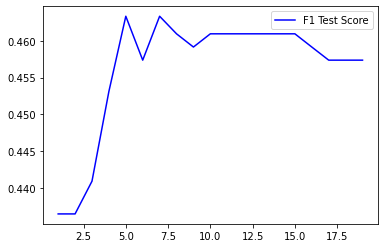

In [137]:
plt.plot(C_range,test_f1,'b',label='F1 Test Score')
plt.legend()
plt.show()

In [138]:
C_range[np.argmax(test_f1)]

5

In [139]:
# Manual Tuning degree

In [140]:
C_range = np.arange(1,10,1)
test_f1 = []

for i in C_range:
    Model = SVC(degree = i, class_weight={0:0.2,1:0.8},max_iter=400)
    Model.fit(X_train_sc,y_train_sc)
    y_pred_ts = Model.predict(X_test_sc)
    f1_Test = f1_score(y_test_sc,y_pred_ts)
    test_f1.append(f1_Test)

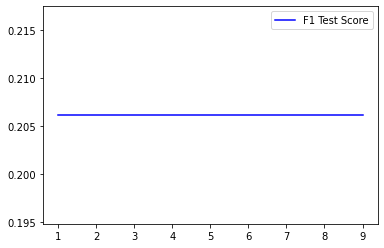

In [141]:
plt.plot(C_range,test_f1,'b',label='F1 Test Score')
plt.legend()
plt.show()

In [142]:
Model_SVM_ManTun = SVC(C = 5, class_weight={0:0.2,1:0.8})

In [143]:
Model_SVM_ManTun.fit(X_train_sc,y_train_sc)

SVC(C=5, class_weight={0: 0.2, 1: 0.8})

In [145]:
acc_SVM_CW_SC_MT, rec_SVM_CW_SC_MT, prec_SVM_CW_SC_MT, roc_SVM_CW_SC_MT, f1_SVM_CW_SC_MT, cm_SVM_CW_SC_MT , cr_SVM_CW_SC_MT = Eva_Matrix_Class(Model_SVM_ManTun,X_test_sc,y_test_sc)

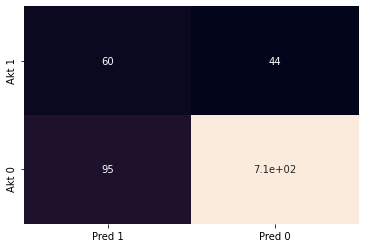

In [146]:
sns.heatmap(cm_SVM_CW_SC_MT,cbar=False,annot=True);

In [147]:
print(cr_SVM_CW_SC_MT)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       801
           1       0.39      0.58      0.46       104

    accuracy                           0.85       905
   macro avg       0.66      0.73      0.69       905
weighted avg       0.88      0.85      0.86       905



In [148]:
data_base = {
    'LR' :[acc_LR, rec_LR, prec_LR, roc_LR, f1_LR],
    'KNN' :[acc_KNN, rec_KNN, prec_KNN, roc_KNN, f1_KNN],
    'SVM' :[acc_SVM, rec_SVM, prec_SVM, roc_SVM, f1_SVM],
    'SVM_Class_Weight' : [acc_SVM_CW, rec_SVM_CW, prec_SVM_CW, roc_SVM_CW, f1_SVM_CW],
    'SVM_Class_Weight_Scaled' : [acc_SVM_CW_SC, rec_SVM_CW_SC, prec_SVM_CW_SC, roc_SVM_CW_SC, f1_SVM_CW_SC],
    'SVM_Hyperparameter_Tuning' :[ACC_SVM, REC_SVM, PREC_SVM, ROC_SVM, F1_SVM],
    'SVM_Manual_Tuning' : [acc_SVM_CW_SC_MT, rec_SVM_CW_SC_MT, prec_SVM_CW_SC_MT, roc_SVM_CW_SC_MT, f1_SVM_CW_SC_MT]
}

In [149]:
pd.DataFrame(data_base,index=['Accuracy','Recall','Precision','ROC_AUC','F1'])

,LR,KNN,SVM,SVM_Class_Weight,SVM_Class_Weight_Scaled,SVM_Hyperparameter_Tuning,SVM_Manual_Tuning
Accuracy,0.876243,0.881768,0.885083,0.870718,0.843094,0.885083,0.846409
Recall,0.153846,0.211538,0.000000,0.403846,0.528846,0.000000,0.576923
Precision,0.400000,0.468085,0.000000,0.432990,0.371622,0.000000,0.387097
ROC_AUC,0.561942,0.590164,0.500000,0.667591,0.706371,0.500000,0.729161
F1,0.222222,0.291391,0.000000,0.417910,0.436508,0.000000,0.463320


In [151]:
df_sc.head()

,age,housing,contact,duration,pdays,previous,y,0
0,30,0,1,79,0,0,0,0.951807
1,33,1,1,220,339,4,0,3.079376
2,35,1,1,185,330,1,0,0.642098
3,30,1,0,199,0,0,0,0.731396
4,59,1,0,226,0,0,0,-0.314670


In [152]:
df1.head()

,age,balance,housing,contact,duration,pdays,previous,y
0,30,1787,0,1,79,0,0,0
1,33,4789,1,1,220,339,4,0
2,35,1350,1,1,185,330,1,0
3,30,1476,1,0,199,0,0,0
4,59,0,1,0,226,0,0,0


In [159]:
# Prediction

In [157]:
Model_SVM_ManTun.predict([[30,1,1,200,10,2,3]])[0]

0

In [158]:
Model_SVM_ManTun.predict([[30,1,1,2000,2,10,5]])[0]

1